In [ ]:
#import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read dataset
# df = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/data_retail.csv', sep=';')
df = pd.read_csv('C:/Users/ACER/Downloads/dataset_dqlab.csv', sep=';')

In [ ]:
print('Top 5 Dataset: ')
print(df.head())

print('Info Dataset: ')
print(df.info())

In [ ]:
#delete no and Row_Num columns
del df['no']
del df['Row_Num']

In [ ]:
#change data type First_Transaction and Last_Transaction
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')

In [ ]:
print('Show Datetime First Transaction  : ', min(df['First_Transaction']))
print('Show Datetime Last Transaction   : ', max(df['Last_Transaction']))

In [ ]:
#filter only 2016 - 2018
data = df

data['Year_First_Transaction'] = df['First_Transaction'].dt.year
data['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

data = data[(data['Year_First_Transaction'] >= 2014) & (data['Year_Last_Transaction'] <= 2018)]
print(data['Year_First_Transaction'].unique())
print(data['Year_Last_Transaction'].unique())

In [171]:
# classify the customers status
data.loc[data['Last_Transaction'] < '2018-06-01', 'is_churn'] = True
data.loc[data['Last_Transaction'] >= '2018-06-01', 'is_churn'] = False

In [172]:
print('Top 5 Dataset: ')
print(data.head(3))

print('Info Dataset: ')
print(data.info())

Top 5 Dataset: 
   Customer_ID Product             First_Transaction  \
0        29531   Jaket 2016-06-19 02:44:34.396000000   
1        29531  Sepatu 2014-07-23 01:02:11.493999872   
4        37545  Sepatu 2015-04-16 10:01:38.530999808   

               Last_Transaction  Average_Transaction_Amount  \
0 2018-10-05 05:48:02.608000000                     1467681   
1 2018-12-25 11:02:41.269999872                     1269337   
4 2018-11-22 12:53:41.529999872                     1775036   

   Count_Transaction  Year_First_Transaction  Year_Last_Transaction is_churn  
0                 22                    2016                   2018    False  
1                 41                    2014                   2018    False  
4                 25                    2015                   2018    False  
Info Dataset: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87401 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---

In [173]:
#color pallete
pallete_year = '#889add', '#6079d2', '#3857c7', '#2d469f', '#223477'
pallete_product = '#134e6f', '#ff6150', '#ffa822', '#1ac0c6', '#dee0e6'
pallete_pie = '#e3f6f5', '#134e6f'
color_title = '#0d0d0d'

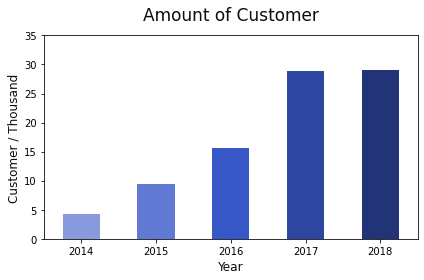

In [174]:
#column by year
data.groupby('Year_First_Transaction')['Customer_ID'].count().plot(kind='bar', color= pallete_year)
plt.title('Amount of Customer', fontsize=17, loc='center', color=color_title, pad=15)
plt.xlabel('Year', fontsize=12, color=color_title)
plt.ylabel('Customer / Thousand', fontsize=12, color=color_title)
labels, location = plt.yticks()
plt.xticks(rotation=0)
plt.yticks(labels, (labels/1000).astype('int'))

plt.tight_layout()
plt.show()

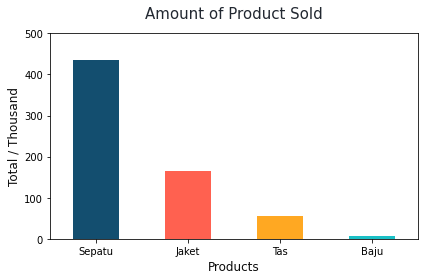

In [175]:
data.groupby('Product')['Count_Transaction'].sum().sort_values(ascending=False).plot(kind='bar', color=pallete_product)
plt.title('Amount of Product Sold', fontsize=15, loc='center', color='#222831', pad=15)
plt.xlabel('Products', fontsize=12, color=color_title)
plt.ylabel('Total / Thousand', fontsize=12, color=color_title)
labels, location = plt.yticks()
plt.xticks(rotation=0)
plt.yticks(labels, (labels/1000).astype('int'))
plt.tight_layout()
plt.show()

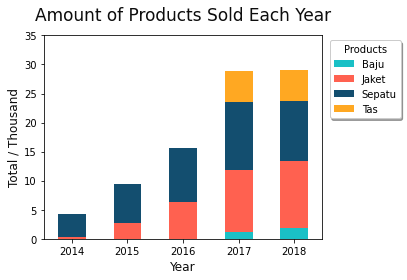

In [176]:
data.groupby(['Year_First_Transaction', 'Product'])['Count_Transaction'].count().sort_values(ascending=False).unstack().plot(kind='bar', stacked=True, color=['#1ac0c6', '#ff6150', '#134e6f', '#ffa822'])
plt.title('Amount of Products Sold Each Year', fontsize=17, loc='center', pad=15, color=color_title)
plt.xlabel('Year', fontsize=12, color=color_title)
plt.ylabel('Total / Thousand', fontsize=12, color=color_title)
labels, location = plt.yticks()
plt.xticks(rotation=0)
plt.yticks(labels, (labels/1000).astype('int'))
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), shadow=True, ncol=1, title='Products')
plt.tight_layout()
plt.show()

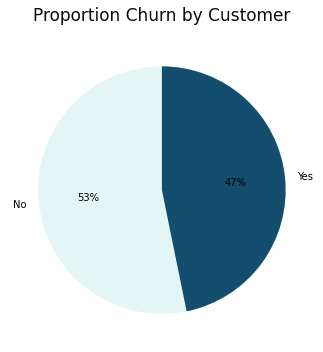

In [177]:
plt.figure(figsize=(5,5))
data_pie = data.groupby(['is_churn'])['Customer_ID'].sum().reset_index()
label = ['No', 'Yes']
plt.pie(data_pie['Customer_ID'], labels=label, autopct='%1.0f%%', startangle=90, colors=pallete_pie)
plt.title('Proportion Churn by Customer', fontsize=17, loc='center', pad=15, color=color_title)
plt.tight_layout()
plt.show()

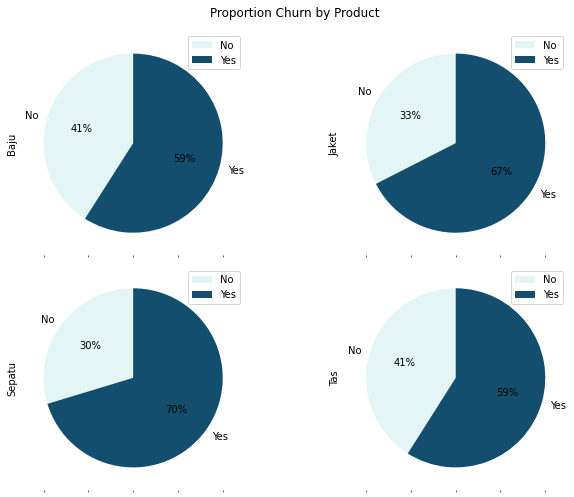

In [188]:
dataset_piv = data.pivot_table(index='is_churn', columns='Product', values='Customer_ID', aggfunc='count', fill_value=0)
plot_product = dataset_piv.count().sort_values(ascending=False).head().index
dataset_piv = dataset_piv.reindex(columns=plot_product)
label = ['No', 'Yes']
dataset_piv.plot.pie(subplots=True, labels=label, figsize=(10, 7), layout=(-1, 2), autopct='%1.0f%%', title='Proportion Churn by Product', startangle=90, colors=pallete_pie)
plt.tight_layout()
plt.show()